<a href="https://colab.research.google.com/github/pranjal2234/Hotel-Bookings/blob/main/Hotel_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
bookings = pd.read_csv("/content/drive/MyDrive/Data/hotel_bookings.csv")
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
bookings.shape

(119390, 32)

**Handling the missing values**

In [4]:
bookings.isnull().sum().sort_values(ascending=False)*100/bookings.shape[0]

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

In [5]:
bookings= bookings.drop(columns= "company")
bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
bookings['total_stay'] = bookings['stays_in_weekend_nights']+bookings['stays_in_week_nights']
bookings['total_person'] = bookings['adults']+bookings['children']+bookings['babies']
bookings.drop(bookings[bookings['adults']+bookings['babies']+bookings['children'] == 0].index, inplace = True)

In [7]:
bookings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119210.0,0.370766,0.483012,0.00,0.0,0.00,1.0,1.0
lead_time,119210.0,104.109227,106.875450,0.00,18.0,69.00,161.0,737.0
arrival_date_year,119210.0,2016.156472,0.707485,2015.00,2016.0,2016.00,2017.0,2017.0
arrival_date_week_number,119210.0,27.163376,13.601107,1.00,16.0,28.00,38.0,53.0
arrival_date_day_of_month,119210.0,15.798717,8.781070,1.00,8.0,16.00,23.0,31.0
stays_in_weekend_nights,119210.0,0.927053,0.995117,0.00,0.0,1.00,2.0,19.0
stays_in_week_nights,119210.0,2.499195,1.897106,0.00,1.0,2.00,3.0,50.0
adults,119210.0,1.859206,0.575186,0.00,2.0,2.00,2.0,55.0
children,119206.0,0.104047,0.398842,0.00,0.0,0.00,0.0,10.0
babies,119210.0,0.007961,0.097509,0.00,0.0,0.00,0.0,10.0


In [8]:
bookings.country.fillna("others",inplace = True)
bookings.agent.fillna(0,inplace = True)
bookings.dropna(inplace=True)

In [9]:
bookings[bookings.duplicated()].shape

(31987, 33)

In [10]:
bookings.drop_duplicates(inplace = True)

In [11]:
bookings.is_canceled.value_counts()

0    63214
1    24005
Name: is_canceled, dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

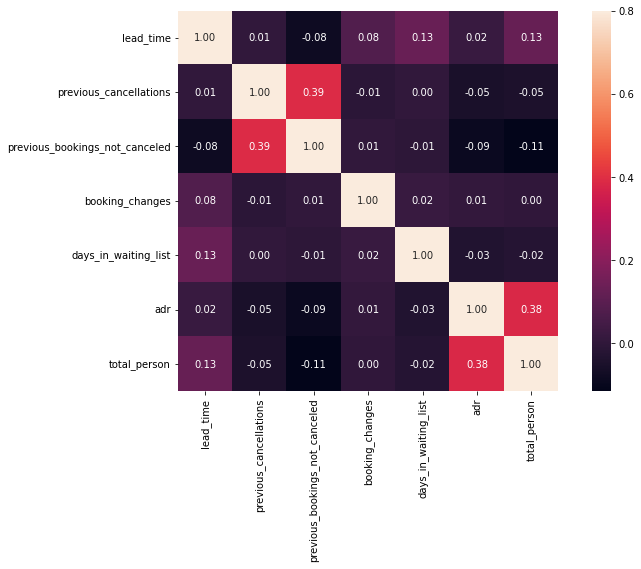

In [13]:
d2= bookings[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','total_person']]
corr = d2.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True)

In [14]:
data_2015 = bookings[(bookings['arrival_date_year'] == 2015) & (bookings['is_canceled'] == 0)]
data_2015 = data_2015.groupby(['arrival_date_month'])['is_canceled'].count().reset_index()
data_2016 = bookings[(bookings['arrival_date_year'] == 2016) & (bookings['is_canceled'] == 0)]
data_2016 = data_2016.groupby(['arrival_date_month'])['is_canceled'].count().reset_index()
data_2017 = bookings[(bookings['arrival_date_year'] == 2017) & (bookings['is_canceled'] == 0)]
data_2017 = data_2017.groupby(['arrival_date_month'])['is_canceled'].count().reset_index()  

In [15]:
data_2016

,arrival_date_month,is_canceled
0,April,2754
1,August,2973
2,December,2131
3,February,2273
4,January,1548
5,July,2753
6,June,2604
7,March,2940
8,May,2836
9,November,2502


In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays
import sort_dataframeby_monthorweek as sd
def sort_month(data, arrival_date_month):
    return sd.Sort_Dataframeby_Month(data, arrival_date_month)

In [17]:
data_2015 = sort_month(data_2015, 'arrival_date_month')
data_2015['year'] = '2015'
data_2016 = sort_month(data_2016, 'arrival_date_month')
data_2016['year'] = '2016'
data_2017 = sort_month(data_2017, 'arrival_date_month')
data_2017['year'] = '2017'

In [18]:
df = pd.concat([data_2015, data_2016,data_2017], axis=0)
df.reset_index()

,index,arrival_date_month,is_canceled,year
0,0,July,1160,2015
1,1,August,1876,2015
2,2,September,2269,2015
3,3,October,2254,2015
4,4,November,1417,2015
5,5,December,1603,2015
6,0,January,1548,2016
7,1,February,2273,2016
8,2,March,2940,2016
9,3,April,2754,2016


Analysis

In [19]:
df["date"] = df["arrival_date_month"] +","+ df['year'].astype(str)

In [24]:
plt.figure(figsize = (17, 8))
a = px.line(df, x = 'date', y = 'is_canceled', title = 'Number of bookings in the given period of time', template = 'ggplot2')
a.update_xaxes(tickangle=315)

<Figure size 1224x576 with 0 Axes>

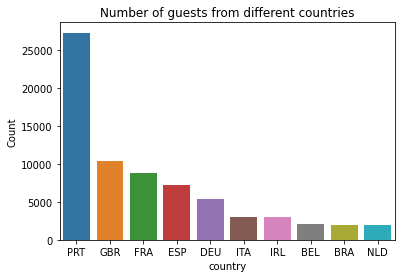

In [26]:
grouped_by_country = bookings.groupby('country')
data1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)
data = data1[:10]
sns.barplot(x = data['country'], y  = data['Count'])
plt.title("Number of guests from different countries")
plt.show()

In [27]:
import folium
from folium.plugins import HeatMap
base = folium.Map()
data1['%_by_country'] = data1['Count']*100/bookings.is_canceled.value_counts()[0]
map = px.choropleth(data1, locations = data1['country'],
                           color = data1['%_by_country'], hover_name = data1['country'])
map.show()

In [28]:
bookings[['children', 'agent']] = bookings[['children',  'agent']].astype('int64')

In [29]:
bookings['reservation_status_date'] = pd.to_datetime(bookings['reservation_status_date'], format = '%Y-%m-%d')

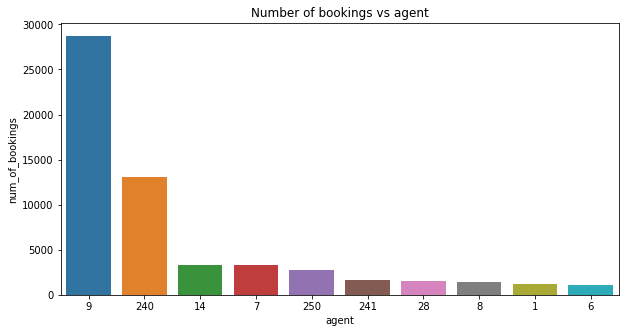

In [30]:
data = pd.DataFrame(bookings['agent'].value_counts()).reset_index().rename\
        (columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
data.drop(data[data['agent'] == 0].index, inplace = True)            
data = data[:10]                                                  
plt.figure(figsize = (10,5))
plt.title("Number of bookings vs agent")
sns.barplot(x = 'agent', y = 'num_of_bookings', data = data, order = data.sort_values('num_of_bookings', ascending = False).agent)

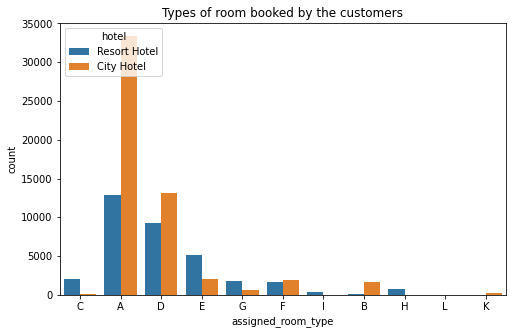

In [31]:
plt.figure( figsize=(8, 5))

sns.countplot(x = bookings['assigned_room_type'], hue=bookings['hotel'])
plt.title("Types of room booked by the customers")
plt.show()

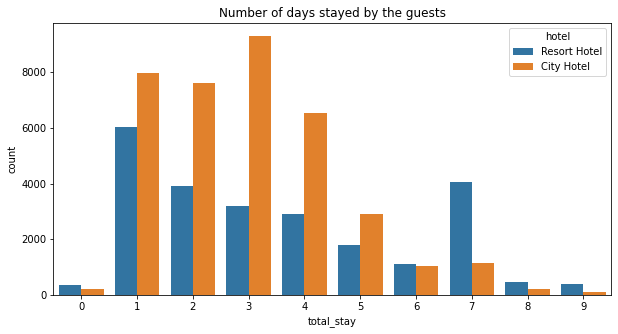

In [32]:
stayed = bookings[bookings['is_canceled'] == 0]
stayed_less_than_10 = stayed[stayed['total_stay'] < 10]
plt.figure(figsize = (10,5))
plt.title("Number of days stayed by the guests")
sns.countplot(x = stayed_less_than_10['total_stay'], hue = stayed_less_than_10['hotel'])
plt.show()

**cancelled data**

In [33]:
cancelled_data = bookings[bookings['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

grouped_by_hotel = bookings.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16031,53268,30.09
Resort Hotel,7974,33951,23.49


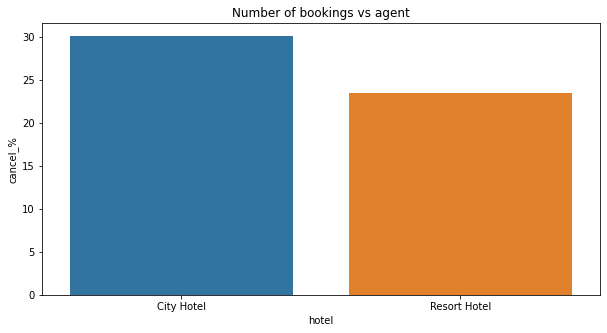

In [34]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.title("Number of bookings vs agent")
plt.show()

**Conclusion : 30 % of City Hotel bookings got canceled. **

 **Repeated Guests** 

In [35]:
repeated_data = bookings[bookings['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)
D3

,total_repeated_guests,total_bookings,repeat_%
hotel,,,
City Hotel,1657,53268,3.11
Resort Hotel,1707,33951,5.03


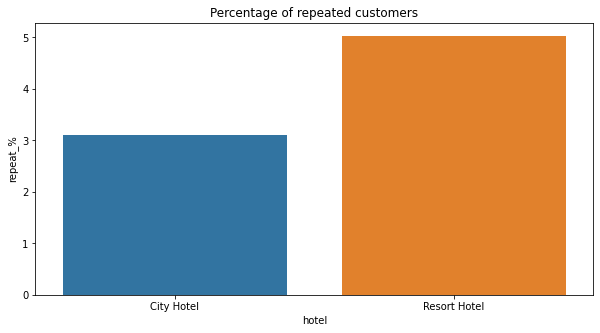

In [36]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.title("Percentage of repeated customers")
plt.show()

**Conclusion :** Around 5% of the customers are repeated customers in Resort Hotels and 3% in City Hotels.

Text(0.5, 1.0, 'Booking % by distribution channels')

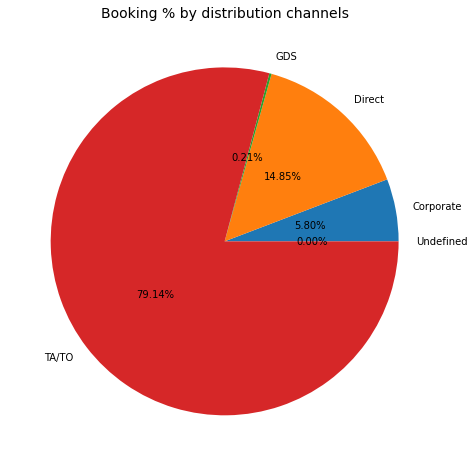

In [37]:
group_by_dc = bookings.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/bookings.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14)

**Conclusion :**Around 79% of the bookings are done through TA/TO(travel agencies and travel organisations)

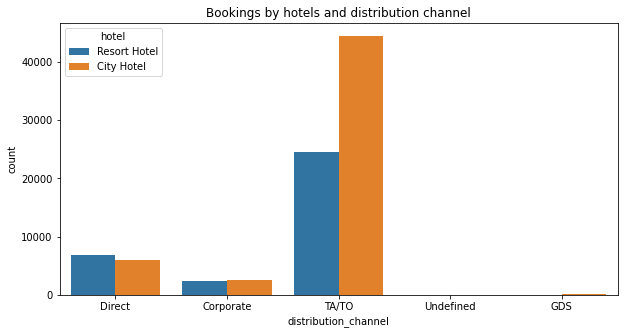

In [38]:
plt.figure(figsize = (10,5))
plt.title("Bookings by hotels and distribution channel")
sns.countplot(x = bookings['distribution_channel'], hue = bookings['hotel'])
plt.show()

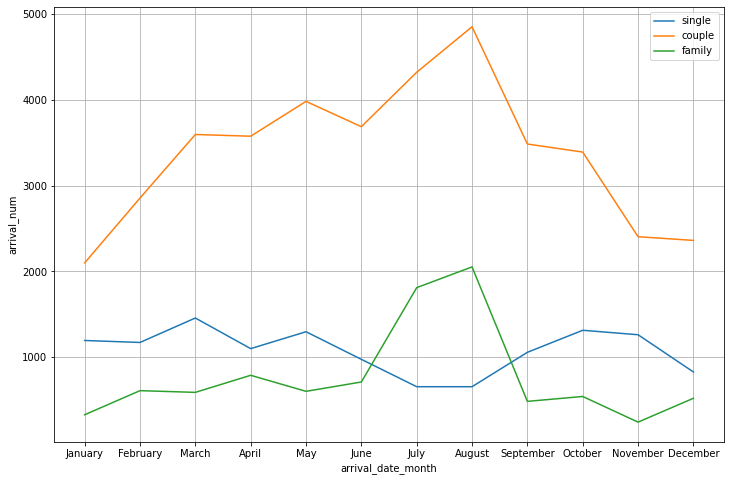

In [39]:
single   = stayed[(stayed['adults']==1) & (stayed['children']==0) & (stayed['babies']==0)]
couple   = stayed[(stayed['adults']==2) & (stayed['children']==0) & (stayed['babies']==0)]
family   = stayed[stayed['adults'] + stayed['children'] + stayed['babies'] > 2]

months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=months,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.show()